# 👗 AI Fashion Item Clustering - Grouping Fashion Items into Categories 👜
Welcome, data scientists and fashion enthusiasts! In this exciting project, your mission is to group similar fashion items into clusters (categories) using unsupervised learning algorithms. We will follow these steps:

- Preprocess images (convert grayscale to vectors).
- Use PCA for dimensionality reduction before clustering.
- Interpret clusters and check how well they match known categories.

Let's dive into the world of fashion data science! 🚀

## 📦 Install & Import Necessary Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:
import warnings
warnings.filterwarnings("ignore")

## 📂 Load the Dataset

In [6]:
# Load the training and test datasets
train_df = pd.read_csv('fashion-mnist_train.csv')
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
test_df = pd.read_csv('fashion-mnist_test.csv')
test_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 📊 Exploratory Data Analysis (EDA) on Dataset

**check for null values**

In [10]:
# Check the shape of the datasets
print(f"Training data shape: {train_df.shape}")

# Check for missing values
print(train_df.isnull().sum())

Training data shape: (60000, 785)
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [11]:
print(f"Test data shape: {test_df.shape}")
print(test_df.isnull().sum())

Test data shape: (10000, 785)
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


**check for duplication**

In [13]:
train_df[train_df.duplicated()].head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
6293,3,0,0,0,0,0,0,0,0,57,...,22,0,0,0,0,0,0,0,0,0
11845,0,0,0,0,0,2,0,0,0,0,...,34,26,22,26,8,0,2,0,0,0
20114,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21571,0,0,0,0,0,0,0,0,0,24,...,136,99,18,0,0,0,0,0,0,0
22159,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_df = train_df[~train_df.duplicated(keep='first')]
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_df["label"].value_counts()

label
5    6000
8    6000
9    5998
0    5998
3    5997
7    5996
1    5996
4    5995
6    5989
2    5988
Name: count, dtype: int64

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

## 🖼️ Convert Grayscale Images to Vectors

### - Why Convert Grayscale Images to Vectors?
When working with machine learning algorithms, we need to convert data into a format that the algorithms can process. For images, this means converting the 2D grid of pixels (28x28 in the case of Fashion MNIST) into a 1D vector. This transformation is essential because most machine learning models expect input data to be in a tabular format (rows and columns).

### - How to Convert Grayscale Images to Vectors?
- Flatten the Image: Each 28x28 pixel image is flattened into a 1D vector of size 784 (28 * 28 = 784).
- Normalization: Pixel values typically range from 0 to 255. Normalizing these values to a range of 0 to 1 can help improve the performance and training stability of machine learning models.

In [19]:
# Extract labels and pixel values
labels = train_df["label"].values 
labels

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

In [20]:
train_df.head(1)[['pixel400','pixel401','pixel402']]

,pixel400,pixel401,pixel402
0,222,221,230


In [21]:
train_df = train_df.drop("label", axis=1)
train_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
images = train_df.values 
print(images[0, 400:403])

[221 230 229]


In [23]:
# Normalize pixel values
images = images / 255.0

print("Normalized pixel values for the first row:")
print(images[0, 400:403])

Normalized pixel values for the first row:
[0.86666667 0.90196078 0.89803922]


### 🔍 Visualizing Images

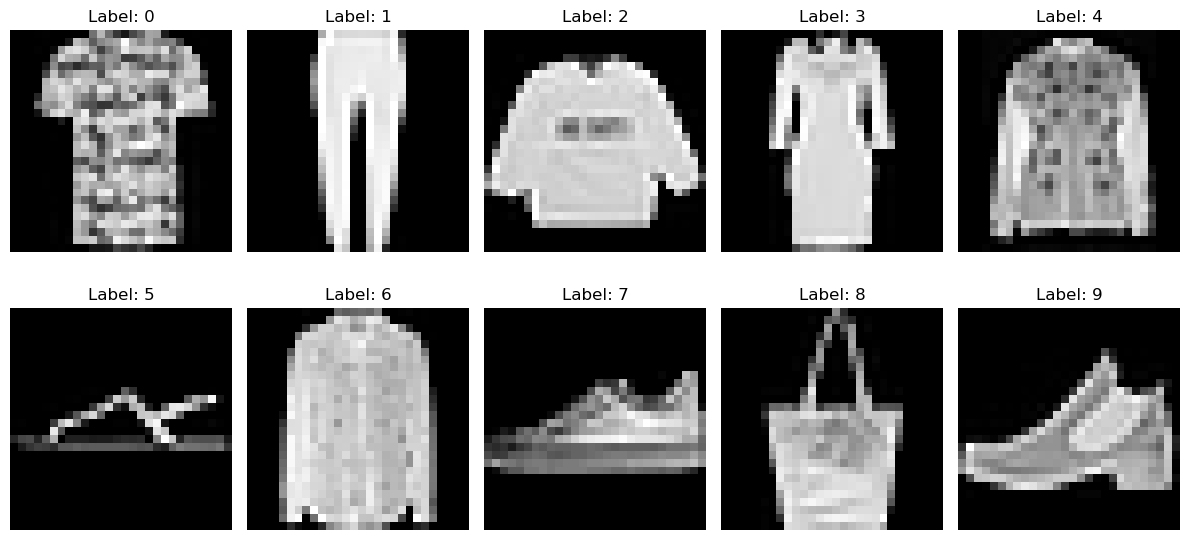

In [25]:
unique_labels = np.unique(labels)

# Plot unique images from the training set
plt.figure(figsize=(12, 6))
for i, label in enumerate(unique_labels):
    idx = np.where(labels == label)[0][0]  # Get the index of the first occurrence of each unique label
    plt.subplot(2, len(unique_labels) // 2, i + 1)
    plt.imshow(images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## 📝 Preprocess Images 🖼️

### 📉 Apply PCA for Dimensionality Reduction

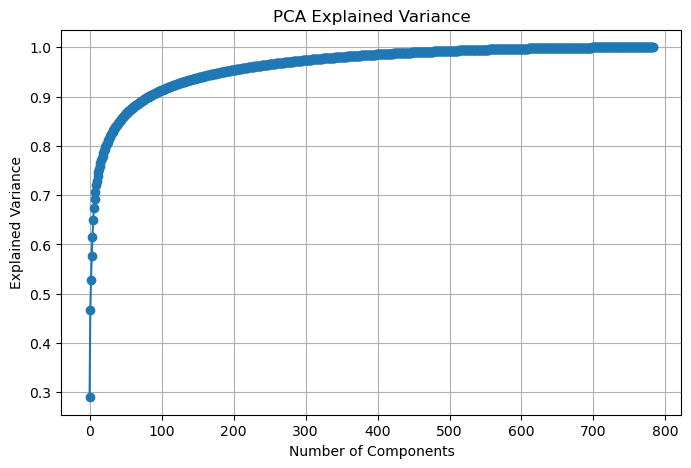

Number of components for 95% explained variance: 187


In [28]:
# Apply PCA
pca = PCA().fit(images)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()

# Find number of components for 95% explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(explained_variance >= 0.95)[0][0] + 1
print(f"Number of components for 95% explained variance: {n_components}")

In [29]:
# Reduce dimensionality using PCA
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(images)
print("Shape after PCA:", images_pca.shape) 

Shape after PCA: (59957, 187)


# 🎯 K-Means Clustering on PCA-Reduced Data

In [31]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(images_pca)
print("Cluster assignments:", np.unique(clusters))

Cluster assignments: [0 1 2 3 4 5 6 7 8 9]


### 🔍 Visualizing Cluster Distribution

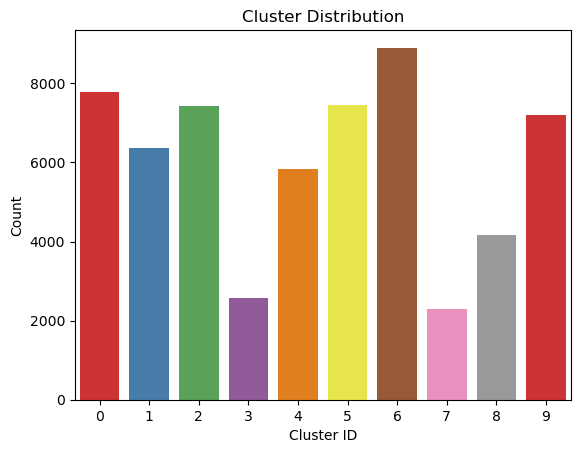

In [33]:
# Plot cluster distribution
sns.countplot(x=clusters, palette='Set1')
plt.title("Cluster Distribution")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()

## Visualize clusters using PCA.

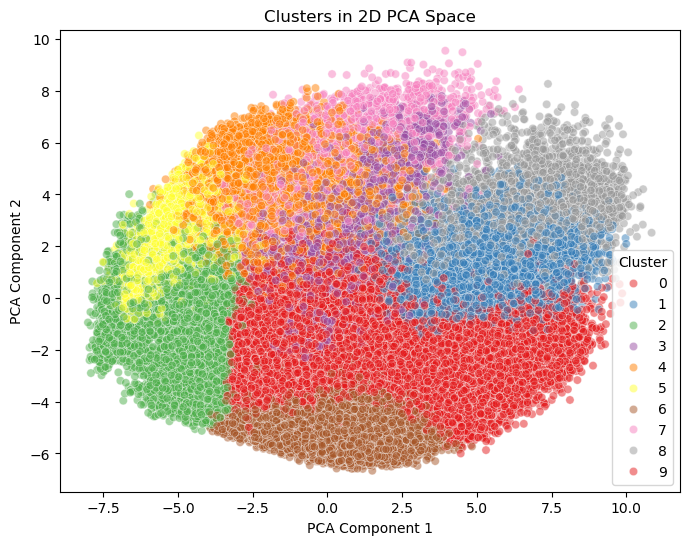

In [35]:
# Reduce to 2D for visualization
pca_2d = PCA(n_components=2)
images_pca_2d = pca_2d.fit_transform(images_pca)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=images_pca_2d[:, 0], y=images_pca_2d[:, 1], hue=clusters, palette='Set1', alpha=0.5)
plt.title("Clusters in 2D PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Test Model